# Classification - RandomForest - Education Attainment

In [26]:
# Import all utitlised libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Next we import and further prepare our data by evaluating the columns.

In [27]:
originalDF = pd.read_csv('educationFeatureSubset.csv')

# Next we check the Education_Attainment options in the dataset for use with classification
print(originalDF.Education_Attainment.unique())

# Now we replace those values with integers for use with the classification algorithm
education_values = {"Education_Attainment": {"Masters": 1, "Some_College": 2, "College": 3, "High_School": 4, "Professional": 5, "Grammar": 6, "Special": 7, "Doctoral": 8, "Other": 9}}
originalDF.replace(education_values, inplace=True)

featureDF = originalDF[originalDF.columns.difference(['Education_Attainment', 'Unnamed: 0'])]
featureDF.head(5)

['Masters' 'Some_College' 'College' 'High_School' 'Professional' 'Grammar'
 'Special' 'Doctoral' 'Other']


,Actual_Time,Age,Country,Household_Income,Marital_Status,Primary_Computing_Platform,Primary_Place_of_WWW_Access,Who_Pays_for_Access_Parents,Who_Pays_for_Access_School,Willingness_to_Pay_Fees
0,14,31,114,7,1,3,5,0,0,4
1,13,18,114,8,5,10,2,0,0,0
2,34,15,31,7,3,10,5,0,0,4
3,40,18,41,4,3,10,2,0,0,0
4,24,7,88,8,5,10,4,0,0,0


Next, I separate the columns into dependent and independent variables (or features and labels). Then you split those variables into a training and test set.

In [28]:
#Splitting the data into independent and dependent variables
X, y = featureDF, originalDF['Education_Attainment']

In [29]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

After data is normalised and split I trained the model on the training set and perform predictions on the test set.

In [30]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

print ('RF accuracy: TRAINING', classifier.score(X_train,y_train))
print ('RF accuracy: TESTING', classifier.score(X_test,y_test))

predict = classifier.predict(X_test)

RF accuracy: TRAINING 0.9992932862190813
RF accuracy: TESTING 0.3880646224859875


After training, I checked the accuracy using actual and predicted values.

In [31]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predict))

Accuracy: 0.3880646224859875


As you can see above our training score is 99% while the tesing data score sits at 38%

In [32]:
classifier.predict([[14,31,114,7,1,3,5,0,0,4]])

array([1])

Here, 1 indicates the occupation type Masters.

### Finding Important Features via RandomForest

In [33]:
import pandas as pd
feature_imp = pd.Series(classifier.feature_importances_,index=featureDF.columns).sort_values(ascending=False)
feature_imp

Age                            0.236657
Country                        0.202623
Actual_Time                    0.144544
Household_Income               0.116973
Willingness_to_Pay_Fees        0.084651
Primary_Computing_Platform     0.069469
Marital_Status                 0.066540
Primary_Place_of_WWW_Access    0.054241
Who_Pays_for_Access_School     0.013857
Who_Pays_for_Access_Parents    0.010446
dtype: float64

As we can see the features are ranked in terms of importance. Age and Country are the most significant features for this classification algorithm it would appear.

No handles with labels found to put in legend.


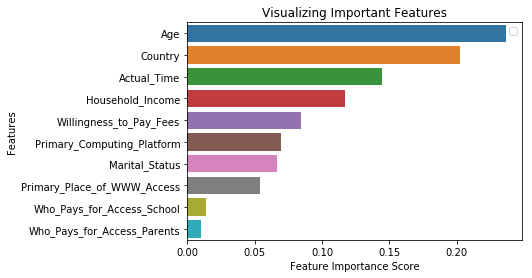

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Now I will generate the Model using Selected Features
Here, you can remove the "Who_Pays_for_Access_School" and "Who_Pays_for_Access_Parents" features because they have very low importance, and select the 8 remaining features.

In [35]:
# Split dataset into features and labels
X=featureDF[['Age', 'Country', 'Actual_Time', 'Primary_Computing_Platform', 'Marital_Status', 'Primary_Place_of_WWW_Access', 'Willingness_to_Pay_Fees', 'Household_Income']]  # Removed feature "web ordering and opinions on censorship"
y=originalDF['Education_Attainment']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

After spliting the data, I generated a new model on the selected training set features, perform predictions on the selected test set features, and compare actual and predicted values.

In [36]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.39768230638778973


You can see that after removing the least important features ("Who_Pays_for_Access_School" and "Who_Pays_for_Access_Parents" ), the accuracy has not increased significantly (1%). I would have thought that because I removed misleading data and noise, this would have resuled in an increased accuracy. A lesser amount of features has however reduced the training time.

## PCA Transformation

Next I will try PCA on my data to see if this improves accuracy.

In [37]:
from sklearn.decomposition import PCA

# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

pca_model = PCA(n_components=2)
pca_model.fit(X_train)
X_train = pca_model.transform(X_train)
X_test = pca_model.transform(X_test)

# 2-Dimensions
X_train[:5]

array([[ 57.36962375, -16.37647085],
       [-27.57134076,   6.41815532],
       [  4.94621079,  16.11757123],
       [ 50.29225037,   4.1929428 ],
       [ 43.99646606,  17.20797019]])

In [38]:
# Fitting Random Forest Classification to the Training set
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

print ('RF accuracy: TRAINING', classifier.score(X_train,y_train))
print ('RF accuracy: TESTING', classifier.score(X_test,y_test))

predict = classifier.predict(X_test)

RF accuracy: TRAINING 0.9990106007067138
RF accuracy: TESTING 0.314540059347181


As you can see above our training score is 99% while the tesing data score sits at 31%. This is reduced from the original after using PCA on the dataset which is not optimal.

In [39]:
classifier.predict([[1,3]])

array([7])

Here, 7 indicates the occupation type Special.

## Finding Important Features via RandomForest

No handles with labels found to put in legend.


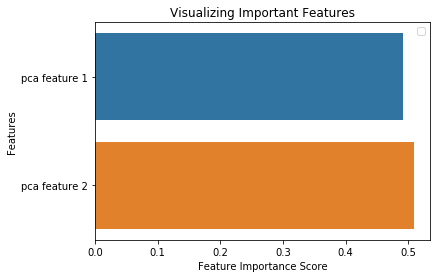

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=classifier.feature_importances_, y=['pca feature 1', 'pca feature 2'])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [41]:
print(list(zip(featureDF, classifier.feature_importances_)))
joblib.dump(classifier, 'randomForest/randomforestmodelEAPCA.pkl')

[('Actual_Time', 0.4911851307118258), ('Age', 0.5088148692881742)]


['randomForest/randomforestmodelEAPCA.pkl']

As indicated above, our reduced PCA features of importance (likely the only two columns left with PCA) are Age and Actual Time

To conclude it is clear from the comparison that PCA feature reduction has not improved the prediction accuracy of the classification algorithm with this set of features. However from review of the initial top features identified via Feature Selection and Univriate selection it does look like the resulting most top features indicated at that stage were identified and chosen with PCA (Age and Actual Time)

# Performance and Comparison:

In summary RandomForest classification has been performed on both a normal and PCA reduced data set for comparison in this analysis for Education_Attainment prediction.

Performance
* RandomForest did not have a strong performance for this predicted value with this data set it is clear. 
* It did provide helpful methods of its own to reduce the feature set further using the feature_importance function.
* It appears that the reduction in data reduced the accuracy of the model.
* PCA did not help performance of this predictor overall either, this did not provide improvement in the model accuracy.
* There was possibly too much distance and noise in the dataset despite best efforts to convert and reduce the feature subset.

Comparison
* Compared to the other algorithms used (Decision tree and K-nearest neighbors) it is quite flexible and easy to implement.
* It does not suffer from the overfitting problem unlike others(K-nearest). The main reason is that it takes the average of all the predictions, which cancels out the biases. This makes me think that this feature set is a weak selection as opposed to being truly overfitted.
* You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.
* In comparison to decision trees the model is difficult to interpret, where you can easily make a decision by following the path in the decision tree you do not have that option here.
* Good at indicating important features (Age versus Age and Country in PCA reduction dataset)
* Of the two RandomForest labels Major Occupation performed significantly better than Education Attainment. So this was the lesser performing label of the two with this algorithm.